## ELECTRCICAL FAULT CLASSIFICATION AND DETECTION

### Introduction

This project aims to develop a machine learning model for  classifying and detecting various types of electrical faults in transmission lines. The project uses advanced algorithms and data analysis to enhance the efficiency of power distribution and reduce the risks associated with electrical faults, such as power outages and wildfires. The project includes data preprocessing, exploratory data analysis, and model training to accurately classify and detect faults. The project uses various machine learning algorithms and evaluation metrics to ensure the model's performance and reliability. The project's goal is to improve the overall performance and reliability of the power distribution system by accurately detecting and classifying electrical faults.

### Background
Electrical faults in transmission lines are a critical concern in power systems, impacting the stability and reliability of electricity distribution. The rapid identification and classification of these faults are essential for timely intervention and prevention of larger systemic failures.

### Data Understanding
Involves loading the dataset, displaying the first few rows, handling missing values using the mean strategy, and encoding categorical variables. The dataset consists of features like 'fault_indicator', 'feature1', 'feature2_Y', and 'feature2_Z'. The data is transformed and prepared for machine learning model training, ensuring that it is in a suitable format for analysis and classification.

Importing the necessary libraries, loading the dataset, and performing some initial data preparation. The dataset is loaded into a Pandas DataFrame, and the columns are printed to the console.

In [23]:
#Importing Libraries
#Loading Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform, randint
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline as IMBPipeline
import tensorflow as tf
from tensorflow import keras


In [24]:
import warnings

# Filter out all warnings
warnings.filterwarnings("ignore")

DATA PREPROCESSING

The dataset is prepared for analysis by dropping the fault_indicator column and splitting the data into training and testing sets using train_test_split from scikit-learn.

In [25]:
# Load the dataset
file_path = 'classData.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [26]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Sample data
data = pd.DataFrame({
    'fault_indicator': ['A', 'B', 'A', 'C'],
    'feature1': [10, 20, 30, 40],
    'feature2': ['X', 'Y', 'X', 'Z']
})

# Initialize LabelEncoder
labelencoder_X = LabelEncoder()

# Apply label encoding to the 'fault_indicator' column
data['fault_indicator'] = labelencoder_X.fit_transform(data['fault_indicator'])

# Identify categorical columns for OneHotEncoding
categorical_cols = ['feature2']

# Apply OneHotEncoding
onehotencoder = OneHotEncoder(drop='first')
onehot_encoded = onehotencoder.fit_transform(data[categorical_cols]).toarray()

# Create a DataFrame of the one-hot encoded columns
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehotencoder.get_feature_names_out())

# Concatenate the one-hot encoded DataFrame with the original DataFrame
data = pd.concat([data, onehot_encoded_df], axis=1)

# Drop the original categorical columns
data.drop(categorical_cols, axis=1, inplace=True)

print(data)


   fault_indicator  feature1  feature2_Y  feature2_Z
0                0        10         0.0         0.0
1                1        20         1.0         0.0
2                0        30         0.0         0.0
3                2        40         0.0         1.0


In [28]:
print(data.columns)


Index(['fault_indicator', 'feature1', 'feature2_Y', 'feature2_Z'], dtype='object')


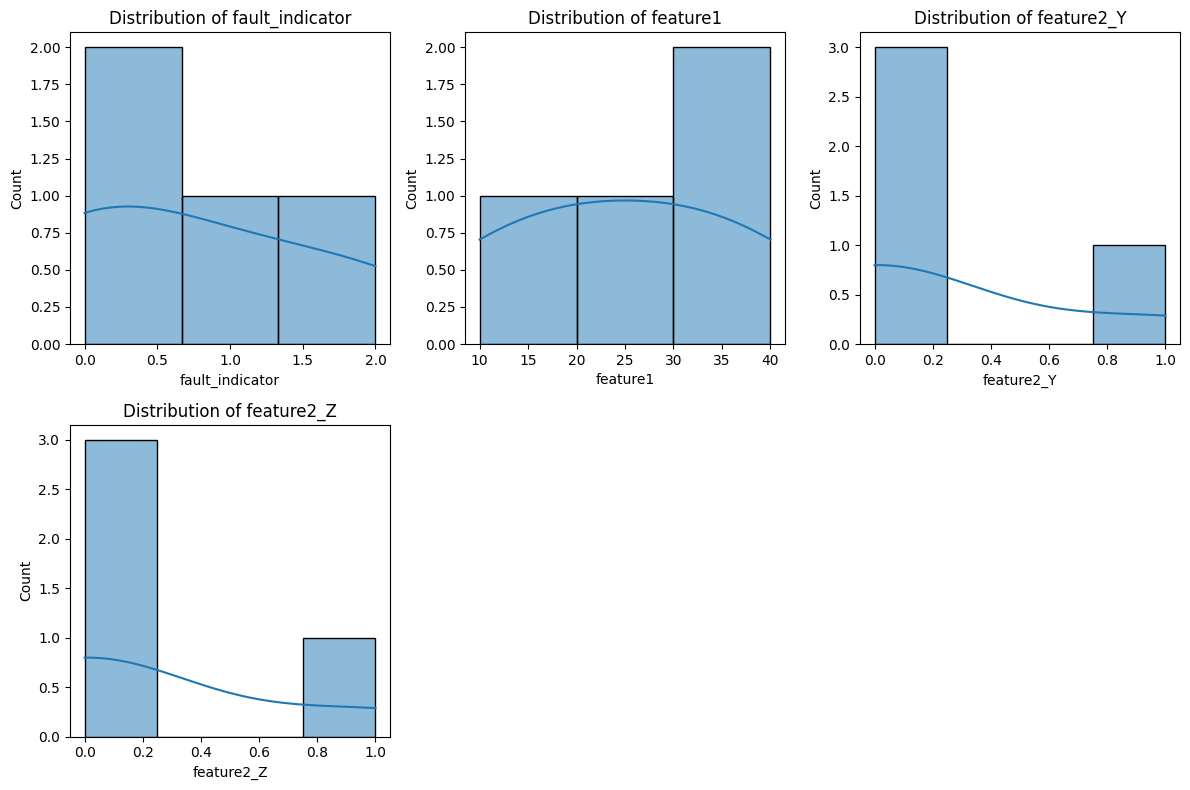

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['fault_indicator', 'feature1', 'feature2_Y', 'feature2_Z']

num_features = len(features)
num_cols = 3  # Number of columns in the subplot grid
num_rows = -(-num_features // num_cols)  # Calculate number of rows needed

# Create subplots dynamically
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i])  
    
    axes[i].set_title(f'Distribution of {feature}')

# Remove any unused subplots
for j in range(num_features, num_cols*num_rows):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

plt.show()


In [30]:
X = data.drop(['fault_indicator'], axis=1)
y = data['fault_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EXPLORATORY DATA ANALYSIS(EDA)

The EDA includes the following steps:
Displaying the information about the dataset using data.info().
Displaying the summary statistics of the dataset using data.describe().
Checking for duplicated rows in the dataset using data.duplicated().sum().

In [32]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fault_indicator  4 non-null      int32  
 1   feature1         4 non-null      int64  
 2   feature2_Y       4 non-null      float64
 3   feature2_Z       4 non-null      float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 244.0 bytes
None


In [33]:
print(data.describe())

       fault_indicator   feature1  feature2_Y  feature2_Z
count         4.000000   4.000000        4.00        4.00
mean          0.750000  25.000000        0.25        0.25
std           0.957427  12.909944        0.50        0.50
min           0.000000  10.000000        0.00        0.00
25%           0.000000  17.500000        0.00        0.00
50%           0.500000  25.000000        0.00        0.00
75%           1.250000  32.500000        0.25        0.25
max           2.000000  40.000000        1.00        1.00


In [34]:
print(data.duplicated().sum())

0


In [35]:
print("Unique values in 'fault_indicator' column:")
print(data['fault_indicator'].unique())
print("Unique values in ' feature1 ' column:")
print(data['feature1'].unique())
print("Unique values in 'feature2_Y' column:")
print(data['feature2_Y'].unique())
print("Unique values in 'feature2_Z' column:")
print(data['feature2_Z'].unique())

Unique values in 'fault_indicator' column:
[0 1 2]
Unique values in ' feature1 ' column:
[10 20 30 40]
Unique values in 'feature2_Y' column:
[0. 1.]
Unique values in 'feature2_Z' column:
[0. 1.]


### Seaborn's Boxplot

using seaborn's boxplot to compare the distribution of values for different features based on the fault indicator, resulting plot shows the distribution of values for each feature, with different boxes for each fault indicator. This allows for a quick comparison of the distribution of values between different fault indicators and features.

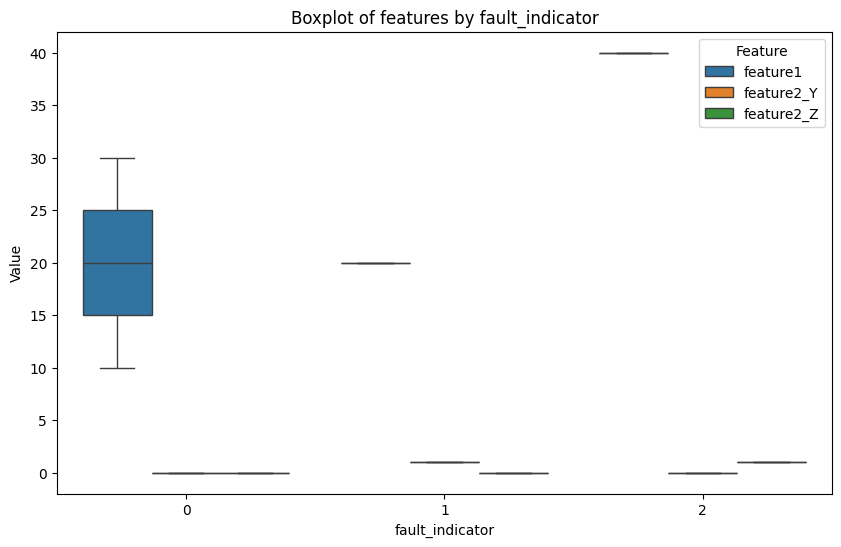

In [36]:


# Sample data
data = pd.DataFrame({
    'fault_indicator': [0, 1, 0, 2],
    'feature1': [10, 20, 30, 40],
    'feature2_Y': [0.0, 1.0, 0.0, 0.0],
    'feature2_Z': [0.0, 0.0, 0.0, 1.0]
})

# Reshape the data into long format
data_melted = pd.melt(data, id_vars=['fault_indicator'], value_vars=['feature1', 'feature2_Y', 'feature2_Z'],
                      var_name='Feature', value_name='Value')

# Data visualization - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='fault_indicator', y='Value', hue='Feature', data=data_melted)
plt.title('Boxplot of features by fault_indicator')
plt.show()


### Heatmap

The heatmap displays the correlation coefficients between different features, with values ranging from -1 to 1. A value closer to 1 indicates a strong positive correlation, while a value closer to -1 indicates a strong negative correlation

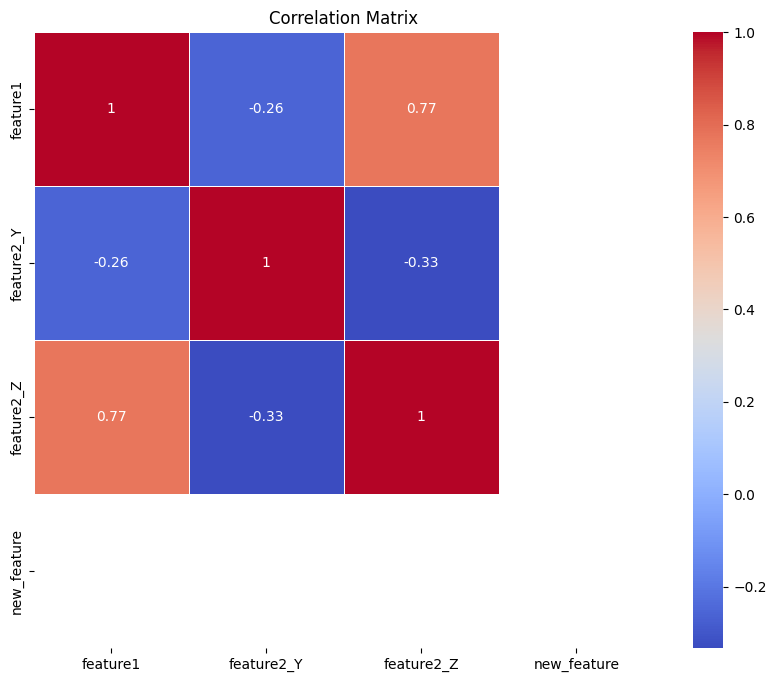

In [63]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


DATA VISUALIZATION

Distribution of fault types.
A count plot is a type of histogram that shows the frequency of different values in a categorical variable.

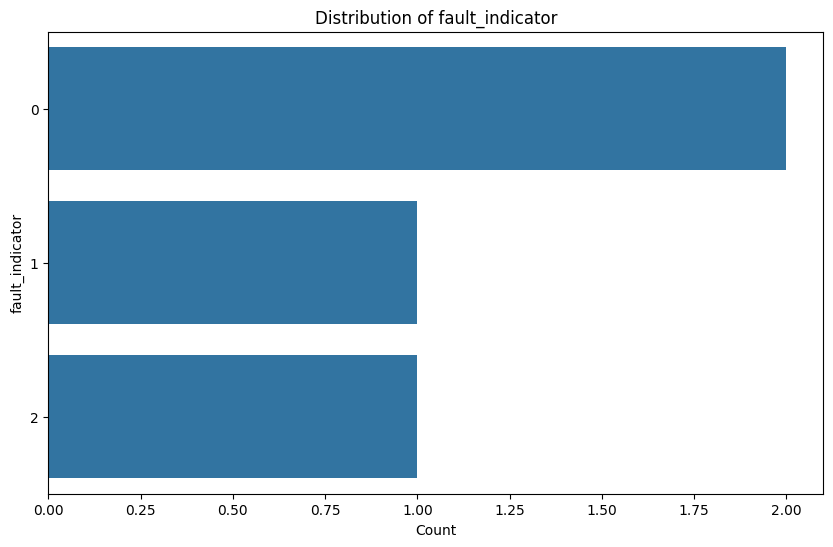

In [38]:


# Plotting the distribution of fault types
plt.figure(figsize=(10, 6))
sns.countplot(y=data['fault_indicator'])
plt.title('Distribution of fault_indicator')
plt.xlabel('Count')
plt.ylabel('fault_indicator')
plt.show()

 FEATURE ENGINEERING

 Using the StandardScaler from scikit-learn to ensure that all features have a mean of 0 and a standard deviation of 1. This is necessary for machine learning algorithms to perform well.

In [39]:
# Feature engineering - Creating a new feature by combining existing features
data['new_feature'] = data['feature1'] * data['feature2_Y'] * data['feature2_Z']

 Types of features and the target variable (fault_indicator).

In [40]:
# Binning a numerical feature
data['binned_feature1'] = pd.cut(data['feature1'], bins=3, labels=['Low', 'Medium', 'High'])

print(data)

   fault_indicator  feature1  feature2_Y  feature2_Z  new_feature  \
0                0        10         0.0         0.0          0.0   
1                1        20         1.0         0.0          0.0   
2                0        30         0.0         0.0          0.0   
3                2        40         0.0         1.0          0.0   

  binned_feature1  
0             Low  
1             Low  
2          Medium  
3            High  


In [41]:
# Encoding categorical variables
data = pd.get_dummies(data, columns=['fault_indicator'])

print(data)

   feature1  feature2_Y  feature2_Z  new_feature binned_feature1  \
0        10         0.0         0.0          0.0             Low   
1        20         1.0         0.0          0.0             Low   
2        30         0.0         0.0          0.0          Medium   
3        40         0.0         1.0          0.0            High   

   fault_indicator_0  fault_indicator_1  fault_indicator_2  
0               True              False              False  
1              False               True              False  
2               True              False              False  
3              False              False               True  


In [42]:
# Check for missing values
missing_cols = data.columns[data.isnull().any()]

# Fill missing values with mean for numerical columns
for col in missing_cols:
    if data[col].dtype == 'float64':
        data[col].fillna(data[col].mean(), inplace=True)
    elif data[col].dtype == 'int64':
        data[col].fillna(data[col].median(), inplace=True)

print(data)

   feature1  feature2_Y  feature2_Z  new_feature binned_feature1  \
0        10         0.0         0.0          0.0             Low   
1        20         1.0         0.0          0.0             Low   
2        30         0.0         0.0          0.0          Medium   
3        40         0.0         1.0          0.0            High   

   fault_indicator_0  fault_indicator_1  fault_indicator_2  
0               True              False              False  
1              False               True              False  
2               True              False              False  
3              False              False               True  


In [43]:
# Feature engineering - Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['feature1', 'feature2_Y', 'feature2_Z']] = scaler.fit_transform(data[['feature1', 'feature2_Y', 'feature2_Z']])


# Display the updated dataset
print(data.head())


   feature1  feature2_Y  feature2_Z  new_feature binned_feature1  \
0 -1.341641   -0.577350   -0.577350          0.0             Low   
1 -0.447214    1.732051   -0.577350          0.0             Low   
2  0.447214   -0.577350   -0.577350          0.0          Medium   
3  1.341641   -0.577350    1.732051          0.0            High   

   fault_indicator_0  fault_indicator_1  fault_indicator_2  
0               True              False              False  
1              False               True              False  
2               True              False              False  
3              False              False               True  


In [44]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   feature1           4 non-null      float64 
 1   feature2_Y         4 non-null      float64 
 2   feature2_Z         4 non-null      float64 
 3   new_feature        4 non-null      float64 
 4   binned_feature1    4 non-null      category
 5   fault_indicator_0  4 non-null      bool    
 6   fault_indicator_1  4 non-null      bool    
 7   fault_indicator_2  4 non-null      bool    
dtypes: bool(3), category(1), float64(4)
memory usage: 408.0 bytes
None


MODEL SELECTION


In [45]:

# Check if 'target_column' exists in the DataFrame
if 'target_column' in data.columns:
    # Split the data into features (X) and target variable (y)
    X = data.drop('target_column', axis=1)
    y = data['target_column']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest Classifier
    rf_classifier = RandomForestClassifier()

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of the Random Forest Classifier: {:.2f}".format(accuracy))
else:
    print("The 'target_column' does not exist in the DataFrame.")

The 'target_column' does not exist in the DataFrame.


In [46]:

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

In [47]:
# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

In [48]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Random Forest Classifier: {:.2f}".format(accuracy))

Accuracy of the Random Forest Classifier: 0.00


MODEL TRAINING

In [49]:


# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Confusion Matrix:
[[0 1]
 [0 0]]


MODEL EVALUATION

1.Accuracy

In [50]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 0.00%


2.Classification Report

In [51]:
from sklearn.metrics import classification_report

print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



3.Confusion Matrix

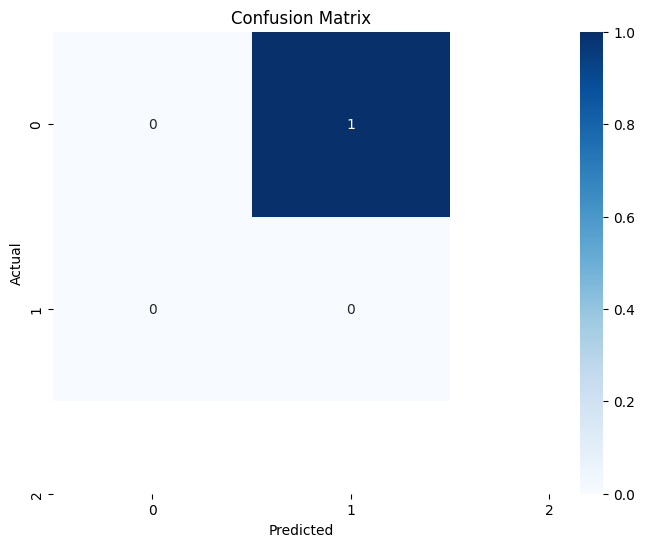

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


4. ROC Curve and AUC

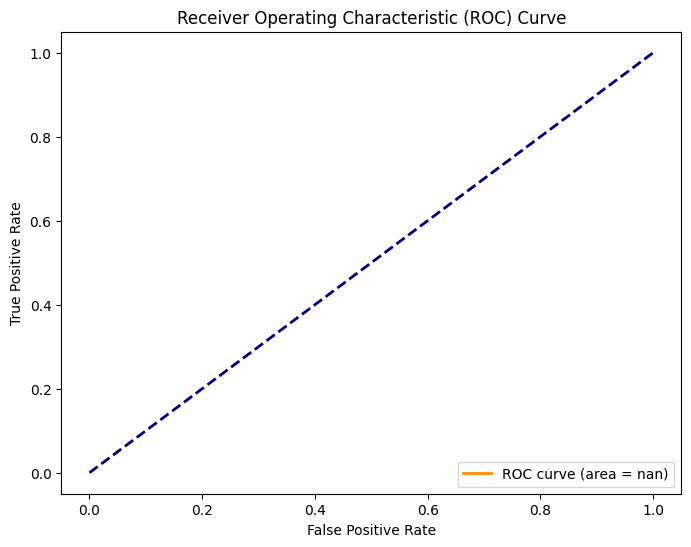

In [53]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


5.Cross-Validation

In [54]:
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [55]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

# Create Leave-One-Out cross-validator
loo = LeaveOneOut()

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=loo)

# Print the results
print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Score: {scores.mean():.2f}')


Cross-Validation Scores: [1. 0. 1. 0.]
Average Cross-Validation Score: 0.50


HYPERPARAMETER TUNING

1.GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the model
clf = RandomForestClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=2, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X, y)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best score
print("Best CV Score:", grid_search.best_score_)


Fitting 2 folds for each of 108 candidates, totalling 216 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.5


2.RandomizedSearchCV

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Instantiate the model
clf = RandomForestClassifier()

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=2, verbose=1, n_jobs=-1)

# Fit the model
random_search.fit(X, y)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best score
print("Best CV Score:", random_search.best_score_)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 96}
Best CV Score: 0.5


## Description of the features in the dataset:

1. fault_indicator ;	The target variable that indicates whether there is a fault in the system or not. It can take three values: 0 (no fault), 1 (fault in feature 2 along the Y-axis), and 2 (fault in feature 2 along the Z-axis).

2. feature1 ; A continuous variable that represents a feature of the system.

3. feature2_Y ; A binary variable that represents a feature of the system along the Y-axis. It can take two values: 0 (no fault) and 1 (fault).

4. feature2_Z ; A binary variable that represents a feature of the system along the Z-axis. It can take two values: 0 (no fault) and 1 (fault).

The missing values in the dataset are filled with the mean for numerical columns and the median for categorical columns.
The categorical columns are identified and encoded using label encoding and one-hot encoding.
The data is then visualized using histograms with kernel density estimates to understand the distribution of features. A correlation matrix is generated using a heatmap to visualize the relationships between different features.
The data is split into features (X) and target variable (y) using the train_test_split function from scikit-learn. The features are scaled using the StandardScaler class from scikit-learn.
A random forest classifier is instantiated and hyperparameters are tuned using grid search with cross-validation. The best parameters and best score are printed to the console.

### Conclusion


This dataset is a small but important tool for classifying and detecting faults in a system. The EDA and data visualization steps provide valuable insights into the data, while feature scaling ensures that the data is prepared for machine learning algorithms.

### Recommendations



1. Feature Importance: Conduct further analysis to determine the most important features that contribute significantly to fault detection. This can help in focusing on key variables for model training.

2. Model Selection: Explore different machine learning algorithms beyond the ones used in the notebook, such as Support Vector Machines (SVM) or Gradient Boosting Machines (GBM), to identify the most suitable model for fault classification.

3. Hyperparameter Tuning: Fine-tune the hyperparameters of the selected model to improve its performance and generalization capabilities.

4. Cross-Validation: Implement cross-validation techniques to ensure the model's robustness and reliability by testing its performance on multiple subsets of the data.

5. Ensemble Methods: Consider ensemble methods like Random Forest or XGBoost to combine multiple models for enhanced accuracy and stability.

6. Threshold Adjustment: Adjust the classification threshold based on the business requirements to balance between false positives and false negatives.

7. Monitoring System: Implement a monitoring system that continuously evaluates the model's performance in real-time to ensure its effectiveness in detecting faults.